<a href="https://colab.research.google.com/github/GesielRodrigues/mini-projetos/blob/main/EBA_desafio_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Ifood**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

*   Perfis de clientes
*   Preferências do produto
*   Sucessos/fracassos da campanha
*   Desempenho do canal

O objetivo do desafio é **fazer uma análise exploratória** desses dados.



**Responder:**


*   Quantos dados temos? Linhas e colunas
*   Quais são as colunas numéricas?
*   Temos duplicados na nossa base? Se tivermos, retirar
*   Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
*   Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?


**Vamos agora entender o perfil de clientes**:

*   Qual é o maior salário encontrado na nossa base? Veja na coluna Income
*   Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
*   Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
*   Quantos clientes temos em cada estado civil? Veja na coluna marital_status


**Agora vamos ver como os dados se correlacionam**:

*   Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
*   As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
*   Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses


**Desafio Extra:**

*   O que você faria com as informações que tirou das perguntas acima?
*   Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.

In [15]:
# Baixar os nossos dados

!pip install gdown==v4.6.3

!gdown 1Wp1gwa6u_o2YiGhqR1D38fZMaENOicJo

Downloading...
From: https://drive.google.com/uc?id=1Wp1gwa6u_o2YiGhqR1D38fZMaENOicJo
To: /content/mkt_data.csv
100% 261k/261k [00:00<00:00, 82.6MB/s]


In [16]:
# Importando as bibliotecas utilizadas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lendo o arquivo .csv

df = pd.read_csv("mkt_data.csv", index_col=0)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,58138.0,0,0,58,635,88,546,172,88,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,64014.0,2,1,56,406,0,30,0,0,8,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,56981.0,0,0,91,908,48,217,32,12,24,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,69245.0,0,1,8,428,30,214,80,30,61,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


# Quantos dados temos? Linhas e colunas

In [18]:
df.shape

(2205, 43)

Temos 2205 linhas e 43 colunas

# Quais são as colunas numéricas?

In [19]:
#mostrando todos os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

As colunas numéricas são aquelas que tem "int64" ou "float64". As colunas categóricas são aquelas que tem o tipo "object"


In [20]:
#selecionando apenas as numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

# Temos duplicados na nossa base? Se tivermos, retire-os

In [21]:
# somando os duplicados da base
df.duplicated().sum()

184

temos 184 duplicados na base, vamos excluir

In [22]:
# Excluindo os dados duplicados e salvando no próprio dataframe
df.drop_duplicates(inplace=True)

# Calculando novamente para comprovar que os duplicados foram excluidos
df.duplicated().sum()

0

In [23]:
df.shape

(2021, 43)

Antes tínhamos 2205 linhas agora temos 2021 (as 184 linhas duplicadas foram removidas)

# Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?

In [24]:
#somando os nulos da base
df.isnull().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1807
marital_Married         1236
marital_Single          1578
marital_Together        1512
marital_Widow           1951
education_2n Cycle      1838
education_Basic         1972
education_Graduation    1006
education_Mast

Temos nulos na base, nas colunas:

marital_Divorced        
marital_Married         
marital_Single          
marital_Together        
marital_Widow           
education_2n Cycle      
education_Basic         
education_Graduation    
education_Master        
education_PhD           

Os nulos indicados acima podem significar que a pessoa não tem aquela determinada característica. Notem que essas colunas só tem nulos ou um outro determinado valor. Por exemplo:

In [25]:
# Contando as ocorrências de um valor na coluna education_PhD
df.education_PhD.value_counts(dropna=False)

NaN    1582
5.0     439
Name: education_PhD, dtype: int64

A coluna education_PhD só tem o número 5.0, que aparece 476 vezes. O restante é nulo.

Isso é um ótimo indício que o nulo significa que a pessoa não tem aquela determinada variável. No caso acima, ela não tem PHD

Portanto, essas colunas podem se tornar um booleano - 1 se tem e 0 se não tem (nulo)

In [26]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
                    , "marital_Married"
                    , "marital_Single"
                    , "marital_Together"
                    , "marital_Widow"
                    , "education_2n Cycle"
                    , "education_Basic"
                    , "education_Graduation"
                    , "education_Master"
                    , "education_PhD"]

In [27]:
# Vamos Substituir os valores existentes por 1 e os Nulos por 0 (booleano)
# Para isso vamos utilizar a função where da biblioteca numpy

for item in colunas_com_nulos:
  df["booleano_"+str(item)] = np.where(df[item].isnull(), 0, 1)

In [28]:
# Criamos novas colunas com os valores bolleanos (observe as ultimas colunas)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,booleano_marital_Divorced,booleano_marital_Married,booleano_marital_Single,booleano_marital_Together,booleano_marital_Widow,booleano_education_2n Cycle,booleano_education_Basic,booleano_education_Graduation,booleano_education_Master,booleano_education_PhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,1,0,0,0,0,1,0,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,1,0,0,0,0,0,1,0,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,0,0,0,0,1,0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,0,0,0,1,0


# Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo das colunas income, kids e expenses?

In [29]:
# Utilizando a função describe já temos todas as informações solicitadas
df[["kids", "Income", "expenses"]].describe()

,kids,Income,expenses
count,2021.000000,2021.000000,2021.000000
mean,0.952994,51687.258783,563.789213
std,0.746123,20713.046401,576.775749
min,0.000000,1730.000000,4.000000
25%,0.000000,35416.000000,55.000000
50%,1.000000,51412.000000,343.000000
75%,1.000000,68274.000000,964.000000
max,3.000000,113734.000000,2491.000000


# Qual é o maior salário encontrado na nossa base? Veja na coluna Income


Conforme visto acima, o valor máximo para Income é 113.734

# Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income

<Axes: >

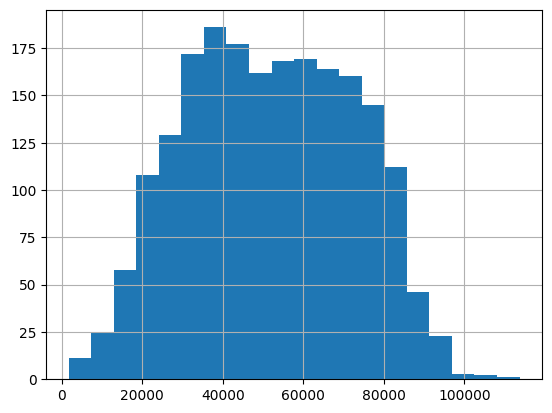

In [31]:
# Plotando histograma
df["Income"].hist(bins=20)

<Axes: ylabel='Income'>

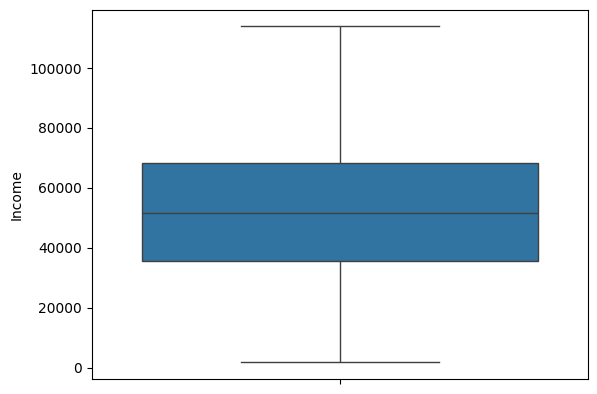

In [32]:
# Plotando Bloxpot
sns.boxplot(df["Income"])

In [41]:
# Calculando o Coeficiente de Variação do salário (Desvio padrão dividido pela Média)
f"CV: {(df['Income'].std() / df['Income'].mean()):.2%}"

'CV: 40.07%'

In [44]:
# Calculando a assimetria
f"Skewness: {df['Income'].skew():.4f}"

'Skewness: 0.0044'

Lembrando que Assimetria (ou skew) é uma medida estatística que avalia se a distribuição dos dados é simétrica ou enviesada para um lado.

Interpretamos o seu resultado da seguinte forma:

*   **Próximo de 0**: os dados são simétricos (normal).
*   **Maior que 0**: a cauda direita da distribuição é mais longa ou mais espalhada (assimetria positiva ou à direita).
*   **Menor que 0**: a cauda esquerda da distribuição é mais longa ou mais espalhada (assimetria negativa ou à esquerda).

**Respondendo ao enunciado**:

Os salarios parecem bem distribuidos na nossa base.

Algumas poucas pessoas ganham pouco e algumas poucas ganham muito, porém não há outliers.


A dispersão por outro lado é grande (muitos dados se afastam da média).


Pelo skew e pelo boxplot, podemos dizer que apesar de não completamente normal, a curva se aproxima de uma normal.

# Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level

<Axes: xlabel='education_level', ylabel='count'>

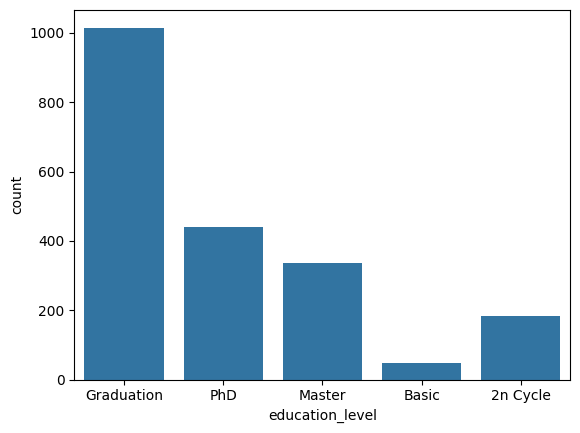

In [45]:
# Gráfico de barras por educação
sns.countplot(x=df["education_level"])

A maior parte dos clientes tem graduação completa.

Poucos clientes concluíram somente o nível básico.

No geral, podemos dizer que a maioria dos clientes tem níveis superiores de educação

# Quantos clientes temos em cada estado civil? Veja na coluna marital_status

<Axes: xlabel='marital_status', ylabel='count'>

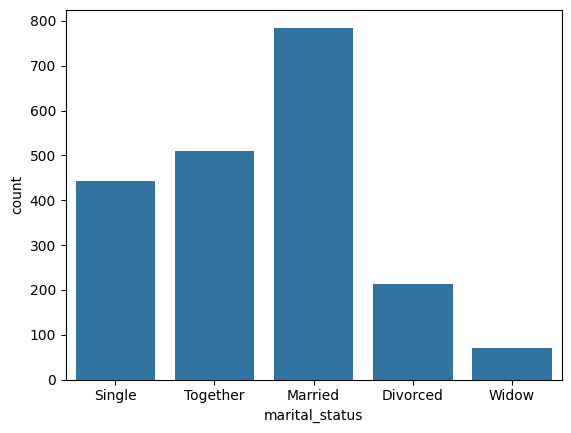

In [46]:
# gráfico de barras por estado civil
sns.countplot(x=df["marital_status"])

A maior parte dos clientes são casados ou "Together" (moram juntos).

Poucos são viúvos.

# Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids


<Axes: xlabel='marital_status', ylabel='kids'>

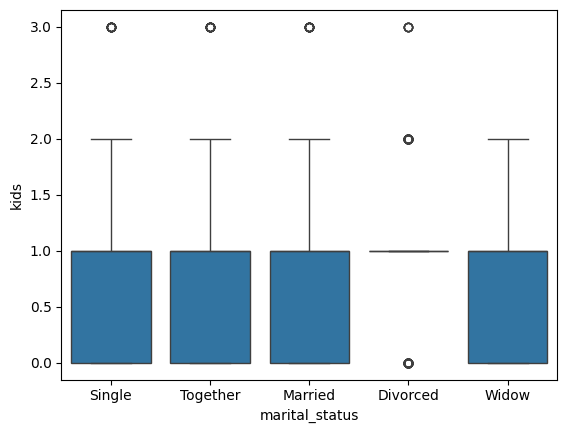

In [47]:
sns.boxplot(x='marital_status', y='kids', data=df)

In [48]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,214.0,1.023364,0.753344,0.0,1.0,1.0,1.0,3.0
Married,785.0,0.977070,0.724558,0.0,0.0,1.0,1.0,3.0
Single,443.0,0.860045,0.771850,0.0,0.0,1.0,1.0,3.0
Together,509.0,0.982318,0.748806,0.0,0.0,1.0,1.0,3.0
Widow,70.0,0.842857,0.734960,0.0,0.0,1.0,1.0,2.0


Vamos calcular a média de filhos por status de união

In [49]:
df.groupby("marital_status")["kids"].mean()

marital_status
Divorced    1.023364
Married     0.977070
Single      0.860045
Together    0.982318
Widow       0.842857
Name: kids, dtype: float64

Vamos calcular a mediana de filhos por status de união

In [50]:
#calculando a mediana de filhos por status de união
df.groupby("marital_status")["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Apesar dos números serem muito próximos, olhando apenas a média dizemos que single (solteiros) tem uma quantidade menor de filhos quando comparado aos outros grupos.

Porém, como podemos ver no boxplot e na mediana, é um número muito próximo um do outro.

Precisaríamos de um teste de hipótese para comprovar diferenças.

# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids


<Axes: xlabel='kids', ylabel='expenses'>

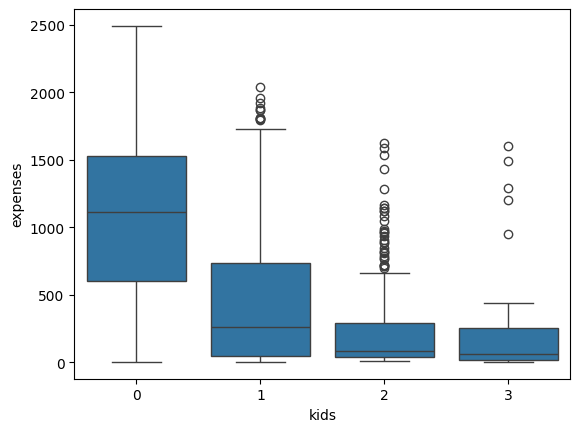

In [51]:
sns.boxplot(x='kids', y='expenses', data=df)

Vamos calcular a média de expenses por status de união

In [52]:
# calculando a média de gastos
df.groupby("kids")["expenses"].mean()

kids
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: expenses, dtype: float64

In [53]:
# calculando a mediana
df.groupby("kids")["expenses"].median()

kids
0    1114.0
1     265.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Podemos ver que tanto a média quanto a mediana 0 e 1 filho é maior nessa amostra de dados, porém a média de 2 filhos é menor do que de 3 filhos, enquanto a mediana de 2 filhos é maior do que de 3 filhos.

Ambos os grupos 2 e 3 tem médias bem maiores do que a mediana, indicando outliers superiores (o próprio gráfico já mostra isso).

Grupo 1 também tem outliers superiores, mas essa diferença é menos acentuada.

Pessoas com nenhum filho tem uma distribuição um pouco mais similar a uma normal (sem outliers, e mediana levemente centrada do meio do boxplot)

# Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

Vamos fazer um gráfico de dispersão mostrando expenses versus income

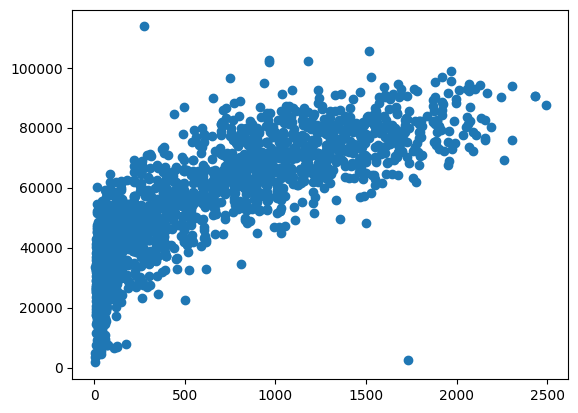

In [54]:
plt.scatter(df["expenses"], df["Income"])
plt.show()

In [55]:
df["expenses"].corr(df["Income"])

0.8192029927546328

Além do gráfico de dispersão também podemos calcular a correlação de Pearson.

O resultado de 0.82 é uma correlação considerável forte.

Podemos, portanto, considerar que sim!

Quanto maior o salário, maior o gasto.